In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
dataV2= pd.read_csv("/Users/Jade/Desktop/TrainingDatasetV2.csv",encoding = "latin1")
dataV2.head()

/Users/Jade/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,Education,...,Company,Company_Norm,Ticker,Exchange,Location,Industry,Layoff Date,Company Name,Employees Affected,laid_off
0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,0,...,VMware,VMware,VMW,XNYS,"san francisco, ca",541512,3/12/2018,"VMware, Inc",159,0.0
1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,Software Engineering,0.570285,Web Development,0.277136,San Ramon,United States,0,...,VMware,VMware,VMW,XNYS,"san francisco, ca",541512,3/28/2016,"VMware, Inc",170,0.0
2,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,6/30/2018,Intel Corporation,65,0.0
3,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,2/24/2017,Intel Corporation,54,0.0
4,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,Software Engineering,0.664485,Web Development,0.236152,San Francisco,United States,5,...,Intel Corporation,Intel Corporation,INTC,XNAS,"portland, oregon area",334413,7/15/2015,Intel Corporation,165,0.0


In [2]:
# use one-hot encoding to encode skillsets
encodeSkill1 = pd.get_dummies(dataV2['Skillset1'], prefix = 's1', prefix_sep='-')
encodeSkill2 = pd.get_dummies(dataV2['Skillset2'], prefix = 's2', prefix_sep='-') 
dataV2 = dataV2.drop(['Skillset1','Skillset2'], axis = 1)
dataV2 = dataV2.join(encodeSkill1) 
dataV2 = dataV2.join(encodeSkill2)
dataV2.head()

,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,Elite Institution,Start Date,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,2007/1/1,...,0,0,0,0,0,0,0,0,0,1
1,6b89d91d-7b71-37fe-bb4c-0084018d63c0,2001,0,0.570285,0.277136,San Ramon,United States,0,0,2007/1/1,...,0,0,0,0,0,0,0,0,0,1
2,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1
3,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1
4,10bbd07e-09b0-3e33-9b6d-897b2d18ad43,1985,0,0.664485,0.236152,San Francisco,United States,5,0,2016/5/1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dataV2.columns

Index(['ID', 'Birth Year', 'Gender Flag', 'Skillset1 Weight',
       'Skillset2 Weight', 'City of profile', 'Country of profile',
       'Education', 'Elite Institution', 'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'Length', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location', 'Industry',
       'Layoff Date', 'Company Name', 'Employees Affected', 'laid_off',
       's1-Administration', 's1-Business Development', 's1-Data Analysis',
       's1-Design', 's1-Digital Marketing', 's1-Electrical Engineering',
       's1-Energy, Oil, and Gas', 's1-Finance', 's1-Healthcare',
       's1-Hospitality', 's1-Human Resources', 's1-IT Management and Support',
       's1-Industrial Management', 's1-Insurance', 's1-Legal', 's1-Logistics',
       's1-Manufacturing and Process Management', 's1-Military',
       's1-Mobile Telecommunications', 's1-Musical Production',
       's1-Non-Profit and Community', 's1-Operations Management',
       

In [4]:
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106108 entries, 0 to 106107
Data columns (total 91 columns):
ID                                         106108 non-null object
Birth Year                                 106108 non-null object
Gender Flag                                106108 non-null int64
Skillset1 Weight                           106108 non-null float64
Skillset2 Weight                           106108 non-null float64
City of profile                            97438 non-null object
Country of profile                         106108 non-null object
Education                                  106108 non-null int64
Elite Institution                          106108 non-null int64
Start Date                                 106108 non-null object
StartFlag                                  106108 non-null object
End Date                                   106108 non-null object
EndFlag                                    106108 non-null int64
CurrentEmployFlag                 

In [5]:
dataV2 = dataV2.dropna(subset=['laid_off'])
dataV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106101 entries, 0 to 106107
Data columns (total 91 columns):
ID                                         106101 non-null object
Birth Year                                 106101 non-null object
Gender Flag                                106101 non-null int64
Skillset1 Weight                           106101 non-null float64
Skillset2 Weight                           106101 non-null float64
City of profile                            97431 non-null object
Country of profile                         106101 non-null object
Education                                  106101 non-null int64
Elite Institution                          106101 non-null int64
Start Date                                 106101 non-null object
StartFlag                                  106101 non-null object
End Date                                   106101 non-null object
EndFlag                                    106101 non-null int64
CurrentEmployFlag                 

In [6]:
dataV2 = dataV2[dataV2['Birth Year' ]!= 'None']
dataV2['Birth Year'] = dataV2['Birth Year'].astype(float)
dataV2 = dataV2.dropna(subset=['Length'])

In [7]:
print(len(dataV2[dataV2['laid_off']==1]))
print(len(dataV2[dataV2['laid_off']==0]))

8038
98023


In [8]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = dataV2['laid_off']
X = dataV2.drop(['ID',
       'City of profile', 'Country of profile','Elite Institution',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'laid_off', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location',
       'Industry', 'Layoff Date', 'Company Name'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
logreg.score(X_test,y_test)

0.9266790282535592

In [10]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

5705
68537


In [11]:
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

2333
29486


In [12]:
# calculate confusion matrix & precision, recall, f-score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test 
y_pred = logreg.predict(X_test)
CM = pd.DataFrame(confusion_matrix(y_true, y_pred),columns = ['Predicted 0','Predicted 1'],\
                  index = ['Actual 0','Actual 1']
                 )
print ('Confusion matrix of test data is: \n', CM)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1
Actual 0        29486            0
Actual 1         2333            0


In [13]:
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.93      1.00      0.96     29486
    laid_off       0.00      0.00      0.00      2333

 avg / total       0.86      0.93      0.89     31819



/Users/Jade/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## From the result above, the prediction for laid_off is bad since the dataset is imbalanced: the number of non-laid_off(laid_off = 0) is much more than the number of laid_off(laid_off = 1)

In [14]:
# Method 1
# use tree-based model to deal with the effect of imbalanced data
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)

0.9307332097174644

In [13]:
# hypermarameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [14]:
# best number of trees
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

print_grid_search_metrics(Grid_RF)

Best score: 0.927
Best parameters set:
	n_estimators: 60


In [20]:
# feature importance
importances = RF.feature_importances_
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Skillset1 Weight: 0.1574
Employees Affected: 0.157
Length: 0.1521
Skillset2 Weight: 0.1498
Birth Year: 0.1085
Education: 0.0461
Gender Flag: 0.0298
s2-Administration: 0.0088
s2-IT Management and Support: 0.0081
s2-Sales: 0.0079
s1-Software Engineering: 0.0074
s2-Mobile Telecommunications: 0.0072
s2-Software Engineering: 0.007
s2-Product Management: 0.0069
s1-Sales: 0.0068
s2-Web Development: 0.0066
s1-Mobile Telecommunications: 0.0066
s2-Electrical Engineering: 0.0064
s1-Product Management: 0.0056
s2-Business Development: 0.0055
s1-IT Management and Support: 0.0055
s2-Human Resources: 0.0053
s1-Electrical Engineering: 0.0046
s2-Data Analysis: 0.0045
s1-Web Development: 0.0045
s1-Administration: 0.0044
s1-Finance: 0.0039
s1-Digital Marketing: 0.0038
s2-Finance: 0.0037
s2-Manufacturing and Process Management: 0.0036
s1-Human Resources: 0.0036
s2-Social Media and Communications: 0.0035
s2-Digital Marketing: 0.0035
s1-Business Development:

In [15]:
# Method 2
# drop non-laid_off data to get balance dataset, make ratio of not_laid_off/laid_off<=10
not_laid_off = dataV2[dataV2['laid_off'] == 0]
laid_off = dataV2[dataV2['laid_off'] == 1]
np.random.seed(101)
drop_indices = np.random.choice(not_laid_off.index, 80000, replace=False)
not_laid_off = not_laid_off.drop(drop_indices)

dataV2 = pd.concat([not_laid_off, laid_off])
print('Training data size after dropping excessive observations: ', dataV2.shape)


Training data size after dropping excessive observations:  (26061, 91)


In [16]:
y = dataV2['laid_off']
X = dataV2.drop(['ID',
       'City of profile', 'Country of profile','Elite Institution',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'laid_off', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'Location',
       'Industry', 'Layoff Date', 'Company Name'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
logreg.score(X_test,y_test)

0.6949737818135311

In [18]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

5639
12603


In [19]:
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

2399
5420


In [20]:
# calculate confusion matrix & precision, recall, f-score
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test 
y_pred = logreg.predict(X_test)
CM = pd.DataFrame(confusion_matrix(y_true, y_pred),columns = ['Predicted 0','Predicted 1'],\
                  index = ['Actual 0','Actual 1']
                 )
print ('Confusion matrix of test data is: \n', CM)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1
Actual 0         5344           76
Actual 1         2309           90


In [21]:
target_names = ['non-laid_off', 'laid_off']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-laid_off       0.70      0.99      0.82      5420
    laid_off       0.54      0.04      0.07      2399

 avg / total       0.65      0.69      0.59      7819



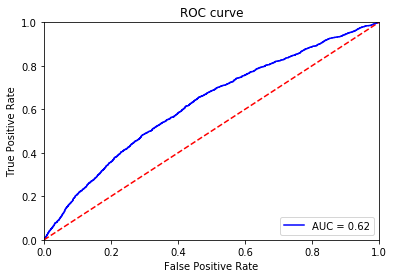

In [25]:
from sklearn.metrics import roc_curve,auc
prob = logreg.predict_proba(X_test)
pred = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,'b',label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()